In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
ice = np.loadtxt("iceplot.out")
mix = np.loadtxt("mixplot.out")
#sal = np.loadtxt("salinityplot.out")
sal = np.loadtxt("salinityplotSSS.out")

In [3]:
A = np.arange(350)
B = np.arange(600)
xx, yy = np.meshgrid(B, A)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'spacing'
  from ipykernel import kernelapp as app
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: The following kwargs were not used by contour: 'spacing'


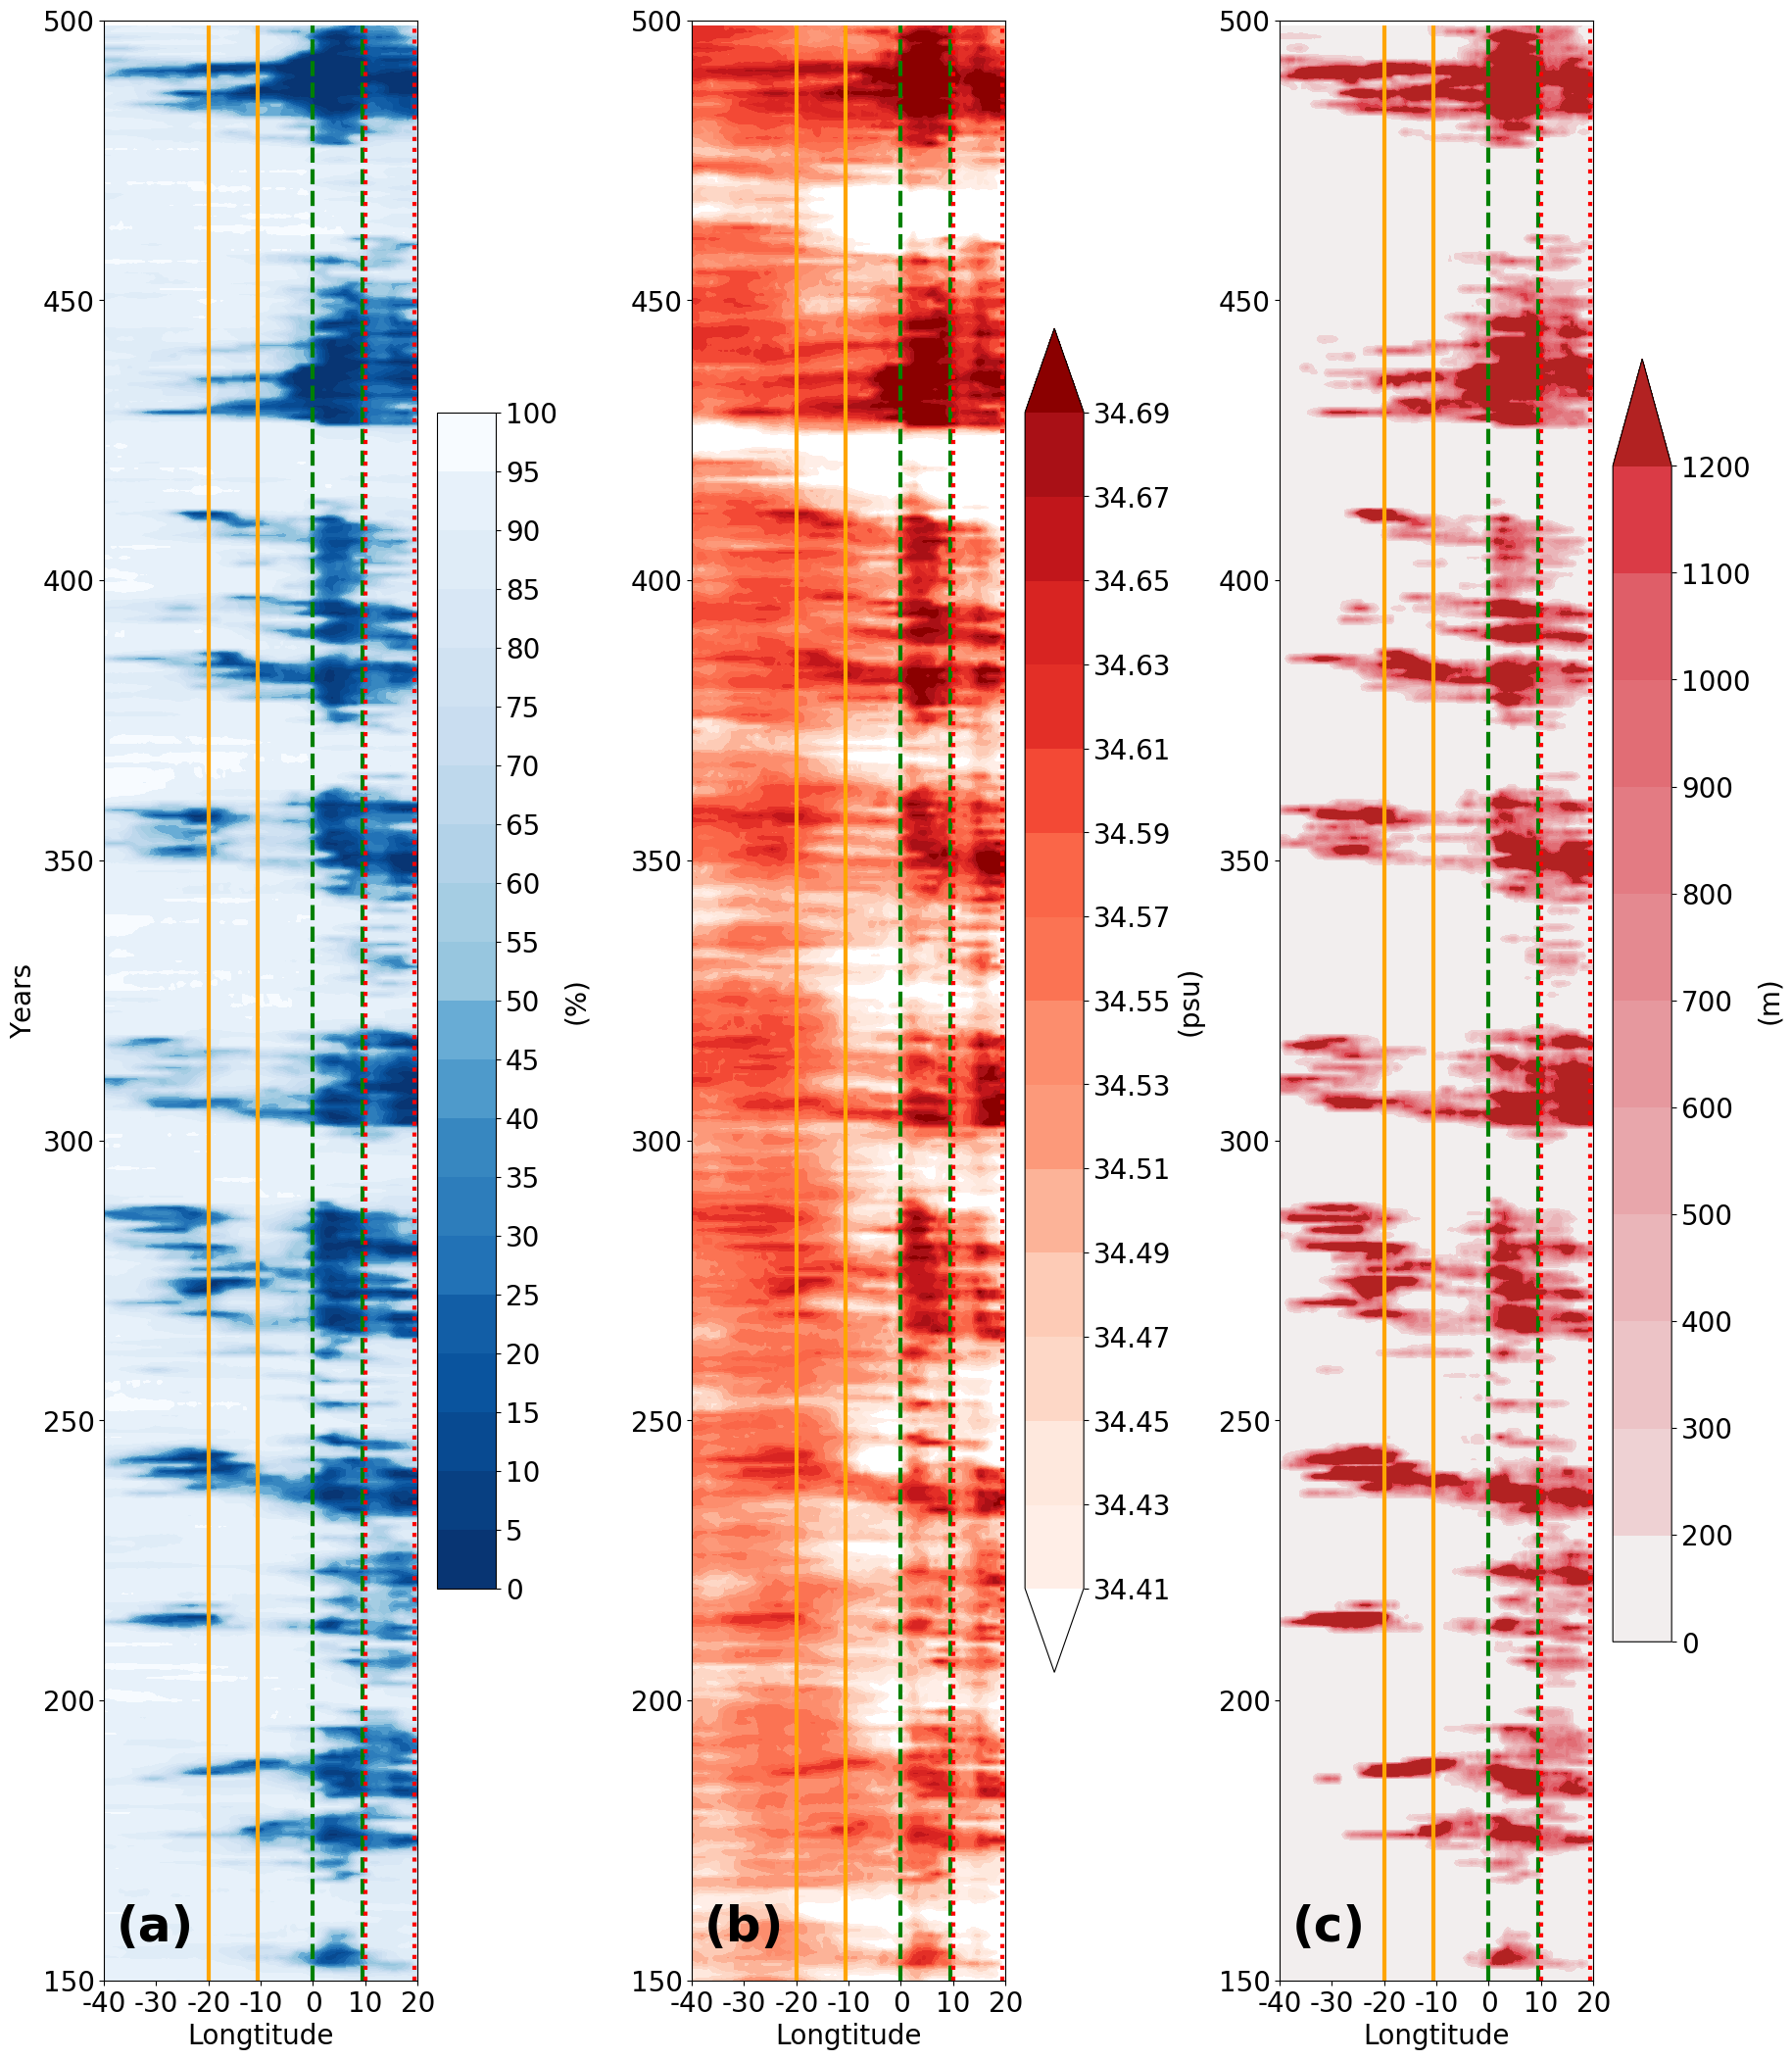

In [6]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,25), dpi=100)
################################################################
ax1 = fig.add_axes([0.1, 0.1, 0.2, 0.8],
                    xticklabels=[])
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

my_font = {'fontname':'Cambria', 'size':'20'}
im = ax1.contourf(xx, yy, ice[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)

im.cmap.set_over('white')

cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(%)', **my_font)

plt.vlines(200, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)
plt.vlines(295, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(500, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)
plt.vlines(595, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)


plt.xticks(range(0,601,100), ['-40','-30','-20','-10', '0', '10', '20'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
                             #'180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
#ax1.set_title('(a)',fontsize=25)
ax1.text(0.04, 0.02, '(a)', transform=ax1.transAxes,size=36, weight='bold')
###########################################
ax2 = fig.add_axes([0.4, 0.1, 0.2, 0.8],
                   xticklabels=[])
nice_cmap=plt.get_cmap('Reds')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
                      200,210,220])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"Reds")
my_font = {'fontname':'Cambria', 'size':'20'}


#################################################################


#nice_levels = [34.43,34.44,34.45,34.46,34.47,34.48,34.49,34.50,34.51,34.52,\
               #34.53,34.54,34.55,34.56,34.57,34.58,34.59,34.6,34.61,34.62,34.63,34.64,34.65,34.66,34.67]
nice_levels = [34.41,34.43,34.45,34.47,34.49,34.51,\
               34.53,34.55,34.57,34.59,34.61,34.63,34.65,34.67,34.69]

norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

im = ax2.contourf(xx, yy,sal,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('darkred')
im.cmap.set_under('white')
plt.vlines(200, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)
plt.vlines(295, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(500, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)
plt.vlines(595, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)


#plt.vlines(700, 0, 349, colors = "purple",linestyles = 'dashdot',linewidth=3)
#plt.vlines(795, 0, 349, colors = "purple",linestyles = "dashdot",linewidth=3)


#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax2, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,601,100), ['-40','-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,351,50), ['150', '200', '250', '300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
#ax2.set_title('(b)',fontsize=25)
ax2.text(0.04, 0.02, '(b)', transform=ax2.transAxes,size=36, weight='bold')
###########################################
ax3 = fig.add_axes([0.7, 0.1, 0.2, 0.8],
                   xticklabels=[])
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,180,190,200,210,220,230,280]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,700,800,900,1000,1100,1200]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

im = ax3.contourf(xx, yy, mix/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax3,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
#ax3.set_title('Mixed Layer Depth')
plt.vlines(200, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)
plt.vlines(295, 0, 349, colors = "orange",linestyles = "solid",linewidth=3)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(500, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)
plt.vlines(595, 0, 349, colors = "red",linestyles = "dotted",linewidth=3)

plt.xticks(range(0,700,100), ['-40','-30', '-20', '-10', '0','10','20'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
#                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,351,50), ['150', '200', '250', '300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
#ax3.set_title('(c)',fontsize=25)
ax3.text(0.04, 0.02, '(c)', transform=ax3.transAxes,size=36, weight='bold')
plt.savefig("fig3new.png",bbox_inches='tight',dpi=fig.dpi)